# KNN-Used Car Price Predictor

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
#Connecting to the sql database
connection_string = "postgres:"+password+"@localhost:5432/hondadb"
engine = create_engine(f'postgresql://{connection_string}')

In [58]:
df_cleaned = pd.read_sql("SELECT * FROM cleanedcardb2",
                     con=engine)

In [59]:
#Select only columns with numerical, continuous values and assign to new DataFrame
continuous_cols = ['Milage', 'Year', 'Price']

df_numeric = df_cleaned[continuous_cols]


#### Convert columns to float datatype

In [60]:
#Convert all numeric columns that contained '?' from object to float type
df_numeric = df_numeric.astype('float')

#Print data types to confirm changes
df_numeric.dtypes

Milage    float64
Year      float64
Price     float64
dtype: object

In [61]:
#Check current status of numerical dataframe
df_numeric.head()

,Milage,Year,Price
0,82394.0,2017.0,10.668583
1,55000.0,2020.0,10.625174
2,60000.0,2020.0,11.108005
3,140000.0,2017.0,10.668583
4,79174.0,2020.0,10.625174


## K-Nearest Neighbours

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#KNearestNeighbours function using default number of neigbhbours (5):
def knn_train_test(df_cleaned,train_col,target_col):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df_cleaned.index)
    random_df = df_cleaned.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    #Train using training column and test column sent to function
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    #Predict using trained model
    predictions = knn.predict(test_df[[train_col]])
    
    #Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse
                   
    
rmse_values = {}
train_cols = normalized.columns.drop('Price')

# For each column in train_cols, train a model, return the RMSE value and add 
#to the dictionary "rmse_results".
for col in train_cols:
    rmse = knn_train_test(normalized, col, 'Price')
    rmse_values[col] = rmse
    
rmse_values

{'Milage': 0.9758381021409221, 'Year': 0.4107711468914256}

In [66]:
rmse_values_series = pd.Series(rmse_values)
rmse_values_series.sort_values()

Year      0.410771
Milage    0.975838
dtype: float64

In [68]:
#KNearestNeighbours function using specified number of neigbhbours:
def knn_train_test(df,train_col,target_col):
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    #Calculate RMSE for each k
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #Train using training column and test column sent to function
        knn.fit(train_df[[train_col]],train_df[target_col])
        
        #Predict using trained model
        predictions = knn.predict(test_df[[train_col]])
    
        #Calculate RMSE for current k value
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(0.5)
    
        k_rmses[k] = rmse
        
    return k_rmses
    
k_rmse_values = {}
train_cols = train_cols = normalized.columns.drop('Price')

# For each column in train_cols, train a model, return the RMSE value and add 
#to the dictionary "rmse_results".
for col in train_cols:
    k_rmse = knn_train_test(normalized, col, 'Price')
    k_rmse_values[col] = k_rmse

k_rmse_values

{'Milage': {1: 1.225950623179965,
  3: 1.0586460949100023,
  5: 0.9758381021409221,
  7: 0.9655873261831339,
  9: 0.9425790569008289},
 'Year': {1: 0.5237985246693654,
  3: 0.4635689854878896,
  5: 0.4107711468914256,
  7: 0.414614609522236,
  9: 0.4155614051725807}}

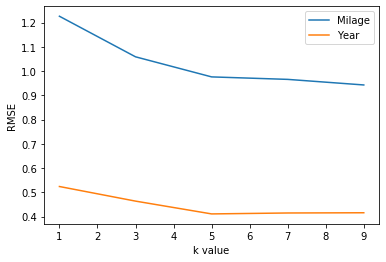

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

#List for legend
leg = []

#Plot rmse for each k value for models trained on each column
for k,v in k_rmse_values.items():
#     print("key: ",k)
#     print("values: ",v)
    x = list(v.keys())
    y = list(v.values())
    leg.append(k)
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.legend(leg, bbox_to_anchor = (1,1))    
plt.show()


#### Results of univariate model

In [70]:
#Compute avg RMSE value for different k values
feature_avg_rmse = {}
for k,v in k_rmse_values.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

In [71]:
#Display best features sorted avg RMSE values
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

Year      0.445663
Milage    1.033720
dtype: float64

#### Multivariate Model

In [73]:
#Multivariate KNearestNeighbours function

def knn_train_test_multi(df,train_cols,target_col):
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    k_value = [5]
    k_rmses = {}
    
    #Calculate RMSE for each k
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #Train using training column and test column sent to function
        knn.fit(train_df[train_cols],train_df[target_col])
        
        #Predict using trained model
        predictions = knn.predict(test_df[train_cols])
    
        #Calculate RMSE for current k value
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(0.5)
    
        k_rmses[str(k) + " Neighbours"] = rmse  
    return k_rmses
    
#Disctionary of RMSE values for each set of features and each number of neighbours
k_rmse_values = {}

two_best_features = ['Milage', 'Year']
rmse = knn_train_test_multi(normalized, two_best_features, 'Price')
k_rmse_values["two best features"] = rmse

three_best_features = ['Milage', 'Year', 'Model']
rmse = knn_train_test_multi(normalized, three_best_features, 'Price')
k_rmse_values["three best features"] = rmse

four_best_features = ['Milage', 'Year', 'Model', 'Car Type']
rmse = knn_train_test_multi(normalized, four_best_features, 'Price')
k_rmse_values["four best features"] = rmse

five_best_features = ['horsepower', 'width', 'curb-weight', 
                      'highway-mpg', 'length']
rmse = knn_train_test_multi(normalized, five_best_features, 'Price')
k_rmse_values["five best features"] = rmse

six_best_features = ['horsepower', 'width', 'curb-weight', 
                     'highway-mpg', 'length', 'city-mpg']
rmse = knn_train_test_multi(normalized, six_best_features, 'Price')
k_rmse_values["six best features"] = rmse

k_rmse_values

KeyError: "None of [Index(['horsepower', 'width'], dtype='object')] are in the [columns]"